Tp= 1.5707963267948966


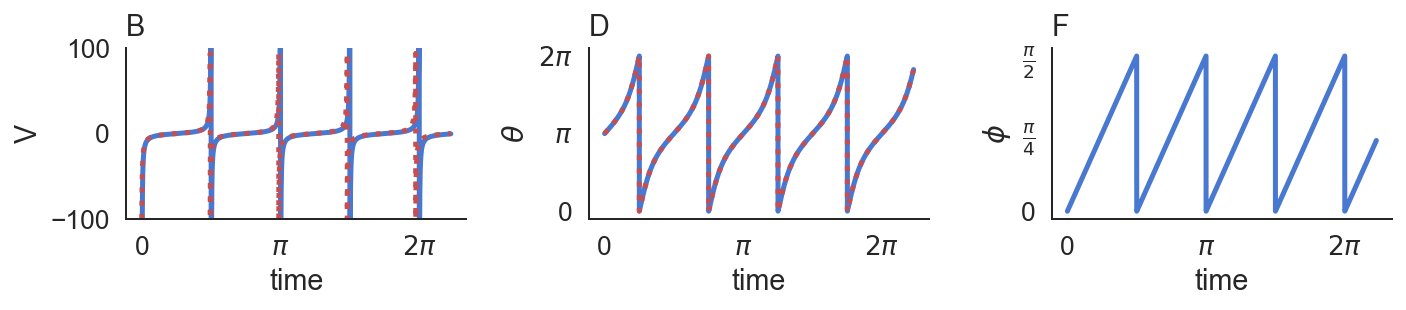

In [3]:
###############################################
## Import packages and specify some settings ##
###############################################

# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

def MyArcTan(x):
    return np.arctan2(1,1/x)


I0=4
Vre=-100
Vth=100

T=7
dt=.001
time=np.arange(0,T,dt)

# Applied current
Ix=np.zeros_like(time)+I0

# Initial condition
V0=Vre

Tp=np.pi/np.sqrt(I0)
print('Tp=',Tp)

# Compute V using the forward Euler method

V=np.zeros_like(time)
theta=np.zeros_like(time)
phi=np.zeros_like(time)
V[0]=V0
theta[0]=np.pi
for i in range(len(time)-1):
    
    
    # Euler step
    V[i+1]=V[i]+dt*(V[i]**2+Ix[i])
    # Threshold-reset condition
    if V[i+1]>=Vth:
        V[i+1]=Vre                
        
    theta[i+1]=theta[i]+dt*(1-np.cos(theta[i])+(1+np.cos(theta[i]))*Ix[i])
    theta[i+1]=np.mod(theta[i+1],2*np.pi)
        
    phi[i+1]=phi[i]+dt*1
    phi[i+1]=np.mod(phi[i+1],Tp)    
    
VClosedForm=-np.sqrt(I0)/(np.tan(time*np.sqrt(I0))+.0001)


plt.subplots(1,3,figsize=(10,2.4))

plt.subplot(1,3,1)
plt.plot(time,VClosedForm)
plt.plot(time,V,'r:')
plt.xlabel('time')
plt.xticks(np.pi*np.array([0,1,2]), ['0', r'$\pi$', r'$2\pi$'])
plt.ylabel('V')
sns.despine()
plt.ylim([Vre,Vth])
plt.title('B',loc='left')


thetaClosedForm=2*(MyArcTan(VClosedForm))

plt.subplot(1,3,2)
plt.plot(time,theta)
plt.plot(time,thetaClosedForm,'r:')
plt.xlabel('time')
plt.xticks(np.pi*np.array([0,1,2]), ['0', r'$\pi$', r'$2\pi$'])
plt.yticks(np.pi*np.array([0,1,2]), ['0', r'$\pi$', r'$2\pi$'])
plt.ylabel(r'$\theta$')
sns.despine()
plt.title('D',loc='left')



plt.subplot(1,3,3)
plt.plot(time,phi)
plt.xlabel('time')
plt.xticks(np.pi*np.array([0,1,2]), ['0', r'$\pi$', r'$2\pi$'])
plt.yticks(np.pi*np.array([0,.25,.5]),['0',r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])
plt.ylabel(r'$\phi$')
sns.despine()
plt.title('F',loc='left')

plt.tight_layout()


Tp= 1.5707963267948966
s-sHat= [0.228 0.228 0.228] epsilon*G(phi0)= 0.25 Ga(phi0)= 0.23182380450040307


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


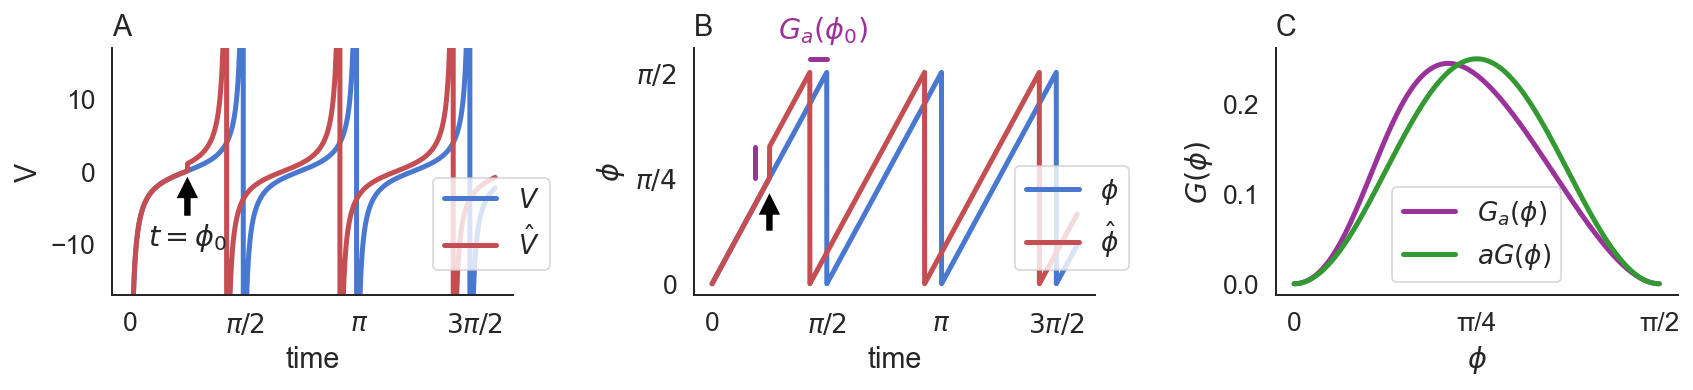

In [4]:

I0=4
Vre=-100
Vth=100

T=5
dt=.001
time=np.arange(0,T,dt)

# Perturbation
a=1
phi0=np.pi/4

# Applied current
Ix=np.zeros_like(time)+I0

# Initial condition
V0=Vre


def G(I00,pphi):
    return (np.sin(np.sqrt(I00)*pphi)**2)/I00

def Ga(I00,aa,pphi):
    sI0=np.sqrt(I00)
    tantemp=np.tan(sI0*pphi)
    return (1/sI0)*MyArcTan(sI0*tantemp/(sI0-aa*tantemp))-pphi


Tp=np.pi/np.sqrt(I0)
print('Tp=',Tp)

# Compute V using the forward Euler method

V=np.zeros_like(time)
Vhat=np.zeros_like(time)
phi=np.zeros_like(time)
phihat=np.zeros_like(time)
V[0]=V0
Vhat[0]=V0
flag=False
maxns=10
s=np.zeros(maxns)
sHat=np.zeros(maxns)
iSpike=0
iSpikeHat=0
for i in range(len(time)-1):
    
    
    # Euler step
    V[i+1]=V[i]+dt*(V[i]**2+Ix[i])
    Vhat[i+1]=Vhat[i]+dt*(Vhat[i]**2+Ix[i])
    phi[i+1]=phi[i]+dt*1
    phihat[i+1]=phihat[i]+dt*1
    if i*dt>=phi0 and flag==False:
        Vhat[i+1]=Vhat[i+1]+a
        phihat[i+1]=phihat[i+1]+Ga(I0,a,phi0)
        flag=True
    phi[i+1]=np.mod(phi[i+1],Tp)
    phihat[i+1]=np.mod(phihat[i+1],Tp)    
    # Threshold-reset condition
    if V[i+1]>=Vth:
        V[i+1]=Vre
        s[iSpike]=i*dt
        iSpike=iSpike+1
        

    # Threshold-reset condition
    if Vhat[i+1]>=Vth:
        Vhat[i+1]=Vre
        sHat[iSpike]=i*dt
        iSpikeHat=iSpikeHat+1

        

s=s[:iSpike]
sHat=sHat[:iSpike]
print('s-sHat=',s-sHat,'epsilon*G(phi0)=',a*G(I0,phi0),'Ga(phi0)=',Ga(I0,a,phi0))

VClosedForm=-np.sqrt(I0)/(np.tan(time*np.sqrt(I0))+.0001)



plt.subplots(1,3,figsize=(12,3))


plt.subplot(1,3,1)
plt.plot(time,V,label=r'$V$')
plt.plot(time,Vhat,'r',label=r'$\hat V$')
plt.annotate(r'$t=\phi_0$', xy=(phi0,-.5), xytext=(0, -35),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0))
#plt.plot(np.array([np.pi/2,np.pi/2-Ga(I0,a,phi0)]),0+np.array([0,0]),color=[.6,.2,.6])
#plt.text(phi0+Ga(I0,a,phi0)/2,22,r'$G_a(\phi_0)$',color=[.6,.2,.6])
plt.arrow(phi0,0,0,100)
plt.xlabel('time')
plt.xticks(np.pi*np.array([0,.5,1,1.5]), ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$'])
plt.ylabel('V')
plt.ylim((-17,17))
plt.legend(loc=(.8,.1))
plt.title('A',loc='left')
sns.despine()

plt.subplot(1,3,2)
plt.plot(time,phi,label=r'$\phi$')
plt.plot(time,phihat,'r',label=r'$\hat\phi$')
plt.annotate('', xy=(phi0,np.pi/4-.1), xytext=(0, -20),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0))
plt.text(phi0+Ga(I0,a,phi0)/2,np.pi/2+.25,r'$G_a(\phi_0)$',color=[.6,.2,.6])
plt.plot(np.array([np.pi/2,np.pi/2-Ga(I0,a,phi0)]),np.pi/2+.1+np.array([0,0]),color=[.6,.2,.6])
plt.plot(np.array([phi0,phi0])-.2,np.array([phi0,phi0+Ga(I0,a,phi0)]),color=[.6,.2,.6])
plt.xlabel('time')
plt.xticks(np.pi*np.array([0,.5,1,1.5]), ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$'])
plt.yticks(np.pi*np.array([0,.25,.5]), ['0',r'${\pi}/{4}$', r'${\pi}/{2}$'])
plt.ylabel(r'$\phi$')
plt.legend(loc=(.8,.1))
plt.title('B',loc='left')
sns.despine()


plt.subplot(1,3,3)
phiplot=np.arange(0,Tp,.01)
plt.plot(phiplot,Ga(I0,a,phiplot),color=[.6,.2,.6],label=r'$G_a(\phi)$')
plt.plot(phiplot,a*G(I0,phiplot),color=[.2,.6,.2],label=r'$aG(\phi)$')
plt.xticks(np.pi*np.array([0,1/4,1/2]), ['0', 'π/4', 'π/2'])
plt.xlabel(r'$\phi$')
plt.ylabel(r'$G(\phi)$')
plt.title('C',loc='left')
plt.legend()
sns.despine()

plt.tight_layout()




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


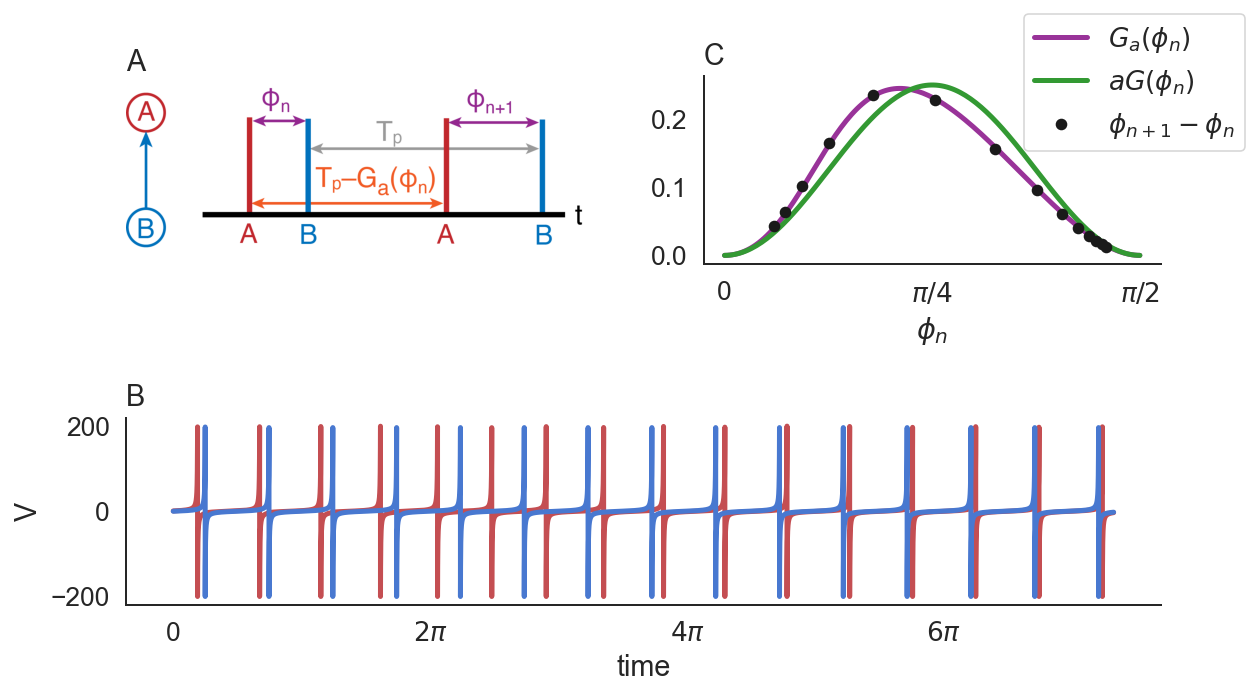

In [5]:

#####
Vth=200
Vre=-200
T=23
dt=.0001
time=np.arange(0,T,dt)

I0=4

# Applied current
Ix=np.zeros_like(time)+I0

w=1

VA=np.zeros_like(time)
VB=np.zeros_like(time)
VA[0]=np.pi/4
VB[0]=0
maxns=20
sA=np.zeros(maxns)
sB=np.zeros(maxns)
iSpikeA=0
iSpikeB=0
for i in range(len(time)-1):
    
    
    # Euler step
    VA[i+1]=VA[i]+dt*(VA[i]**2+Ix[i])
    VB[i+1]=VB[i]+dt*(VB[i]**2+Ix[i])    
    # Threshold-reset condition
    if VA[i+1]>=Vth:
        VA[i+1]=Vre
        sA[iSpikeA]=i*dt
        iSpikeA=iSpikeA+1

    # Threshold-reset condition
    if VB[i+1]>=Vth:
        VB[i+1]=Vre
        VA[i+1]=VA[i+1]+w        
        sB[iSpikeB]=i*dt       
        iSpikeB=iSpikeB+1        

sA=sA[:np.min([iSpikeA,iSpikeB])]
sB=sB[:np.min([iSpikeA,iSpikeB])]
psiSim=sB-sA
  


psiTh=np.zeros_like(psiSim)
psiTh[0]=psiSim[0]
for n in range(len(psiTh)-1):
    psiTh[n+1]=psiTh[n]+Ga(I0,w,psiTh[n])#w*(np.sin(np.sqrt(I0)*psiTh[n])**2)/I0
            
plt.subplots(figsize=(9,5))

plt.subplot(2,2,1)
# Get image for plot
try: 
    im = plt.imread('../ImageFiles/CoupledPhaseOscDiagram.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/ImageFiles/CoupledPhaseOscDiagram.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')



plt.subplot(2,2,2)
phiplot=np.arange(0,Tp,.01)
plt.plot(phiplot,Ga(I0,w,phiplot),color=[.6,.2,.6],label=r'$G_a(\phi_n)$')
plt.plot(phiplot,w*G(I0,phiplot),color=[.2,.6,.2],label=r'$aG(\phi_n)$')
plt.plot(psiSim[:-1],psiSim[1:]-psiSim[:-1],'ko',label=r'$\phi_{n+1}-\phi_n$')
plt.xticks(np.pi*np.array([0,1/4,1/2]), ['0', r'$\pi/4$', r'$\pi/2$'])
plt.xlabel(r'$\phi_n$')
plt.ylabel(r'$\;$')
#plt.ylabel(r'$G(\phi_n)$')
plt.legend(loc=(.7,.6))
plt.title('C',loc='left')
#plt.ylabel(r'$G(\phi)$')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,VA,'r')
plt.plot(time,VB)
plt.xlabel('time')
plt.xticks(2*np.pi*np.array([0,1,2,3]), ['0', r'$2\pi$', r'$4\pi$', r'$6\pi$'])
plt.ylabel('V')
plt.title('B',loc='left')
sns.despine()


plt.tight_layout()

